In [32]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# loading the dataset
data = pd.read_csv("student marks and percentage.csv")
data

,Study_hours,Students_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
6,6.67,76.99
7,NaN,85.46
8,5.19,70.66
9,6.75,77.82


In [34]:
data.head()

,Study_hours,Students_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [35]:
data.shape

(15, 2)

## Discover and visualize the data to gain insights

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Study_hours     12 non-null     float64
 1   Students_marks  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [37]:
data.describe()

,Study_hours,Students_marks
count,12.000000,15.000000
mean,7.094167,78.975333
std,1.097588,4.329276
min,5.190000,70.660000
25%,6.582500,76.865000
50%,6.790000,78.680000
75%,7.972500,82.130000
max,8.670000,85.460000


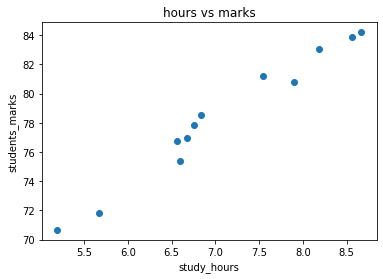

In [38]:
plt.scatter(x = data.Study_hours , y = data.Students_marks)
plt.xlabel("study_hours")
plt.ylabel("students_marks")
plt.title("hours vs marks")
plt.show()

In [39]:
# prepare the data for machine learning algorithms 
## data cleaning 
data.isnull()

,Study_hours,Students_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
5,False,False
6,False,False
7,True,False
8,False,False
9,False,False


In [40]:
data.isnull().sum()

Study_hours       3
Students_marks    0
dtype: int64

In [41]:
data.mean()

Study_hours        7.094167
Students_marks    78.975333
dtype: float64

In [42]:
dataset = data.fillna(data.mean())

In [45]:
dataset.isnull().sum()

Study_hours       0
Students_marks    0
dtype: int64

In [44]:
dataset.head()

,Study_hours,Students_marks
0,6.830000,78.50
1,6.560000,76.74
2,7.094167,78.68
3,5.670000,71.82
4,8.670000,84.19


In [46]:
# spliting X and y 
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [47]:
X.shape

(15, 1)

In [48]:
y.shape

(15,)

In [49]:
print(X)

    Study_hours
0      6.830000
1      6.560000
2      7.094167
3      5.670000
4      8.670000
5      7.550000
6      6.670000
7      7.094167
8      5.190000
9      6.750000
10     6.590000
11     8.560000
12     7.094167
13     7.900000
14     8.190000


In [50]:
print(y)

0     78.50
1     76.74
2     78.68
3     71.82
4     84.19
5     81.18
6     76.99
7     85.46
8     70.66
9     77.82
10    75.37
11    83.88
12    79.50
13    80.76
14    83.08
Name: Students_marks, dtype: float64


In [51]:
from sklearn.model_selection import  train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state=0)

In [54]:
X_train.shape

(12, 1)

In [55]:
X_test.shape

(3, 1)

In [56]:
# now we are going to select the model and train it
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [57]:
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
lr.coef_

array([3.76147725])

In [59]:
lr.intercept_

52.4381844105621

In [60]:
m = 3.76
c = 52.4
y = m * 4 + c
y

67.44

In [64]:
lr.predict([[4]])[0].round(2)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.48

In [65]:
y_pred = lr.predict(X_test)
y_pred

array([77.11347518, 77.52723768, 71.96025135])

In [67]:
pd.DataFrame(np.c_[X_test,y_test,y_pred], columns = ["Study_hours", "Students_mark_orignal" , "Students_mark_predicted"])

,Study_hours,Students_mark_orignal,Students_mark_predicted
0,6.56,76.74,77.113475
1,6.67,76.99,77.527238
2,5.19,70.66,71.960251


In [68]:
# fine tune your model
lr.score(X_test,y_test)

0.9175555618389202

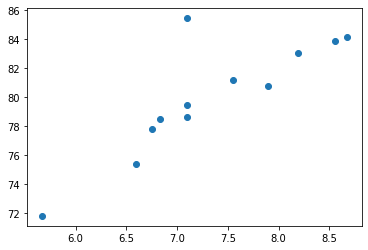

In [69]:
plt.scatter(X_train,y_train)

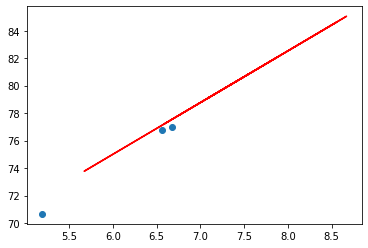

In [70]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train) , color = 'r')

In [71]:
# present your solution
## saving ml model
import joblib
joblib.dump(lr, "student_marks_prediction_model.pkl")

['student_marks_prediction_model.pkl']

In [72]:
model = joblib.load("student_marks_prediction_model.pkl")

In [73]:
model.predict([[5]])

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71.24557067])